# linear regression 

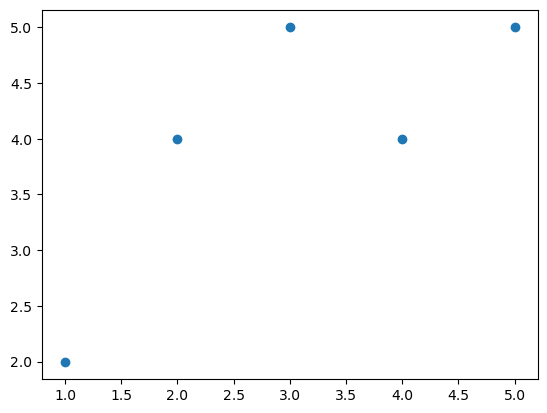

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x=np.array([1,2,3,4,5])#input feature
y=np.array([2,4,5,4,5])#target
slope,intercept=np.polyfit(x,y,1)
y_pred=slope*x+intercept
plt.scatter(x,y,label=('Data points'))

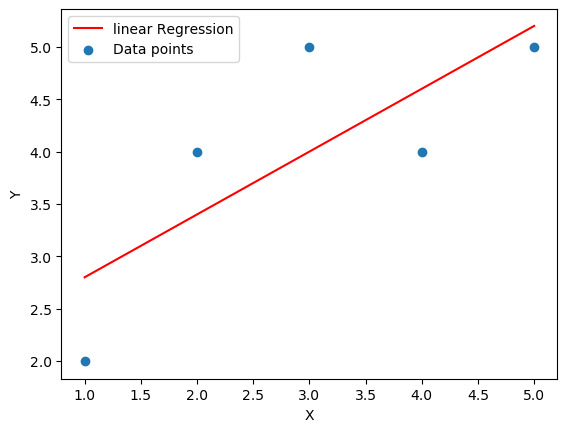

In [4]:

plt.scatter(x,y,label=('Data points'))

plt.plot(x,y_pred,color='red',label='linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [5]:
print(f"slope:{slope}")
print(f"intercept:{intercept}")

slope:0.6000000000000003
intercept:2.199999999999998


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("/home/s5ad2/Downloads/car data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    299 non-null float64
Kms_Driven       300 non-null float64
Fuel_Type        299 non-null object
Seller_Type      298 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.3+ KB


In [9]:
data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900.0,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200.0,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450.0,Diesel,Dealer,Manual,0


In [10]:
row,col=data.shape
print(f"Rows:",row)
print(f"Colomn:",col)

Rows: 301
Colomn: 9


In [11]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    2
Kms_Driven       1
Fuel_Type        2
Seller_Type      3
Transmission     0
Owner            0
dtype: int64

In [12]:
data['Present_Price']=data['Present_Price'].fillna(data['Present_Price'].mean())
data['Kms_Driven']=data['Kms_Driven'].fillna(data['Kms_Driven'].mean())
data['Fuel_Type']=data['Fuel_Type'].fillna(data['Fuel_Type'].mode()[0])
data['Seller_Type']=data['Seller_Type'].fillna(data['Seller_Type'].mode()[0])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null float64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.3+ KB


In [14]:
data['Year']=2024-data['Year']
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,10,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,sx4,11,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,ciaz,7,7.25,9.85,6900.0,Petrol,Dealer,Manual,0
3,wagon r,13,2.85,4.15,5200.0,Petrol,Dealer,Manual,0
4,swift,10,4.60,6.87,42450.0,Diesel,Dealer,Manual,0


In [15]:
data.drop(['Car_Name'],axis=1,inplace=True)

In [16]:
data.head(5)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,10,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,11,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,7,7.25,9.85,6900.0,Petrol,Dealer,Manual,0
3,13,2.85,4.15,5200.0,Petrol,Dealer,Manual,0
4,10,4.60,6.87,42450.0,Diesel,Dealer,Manual,0


In [17]:
data=pd.get_dummies(data,drop_first=True)
data.head(20)

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,10,3.35,5.59,27000.0,0,0,1,0,1
1,11,4.75,9.54,43000.0,0,1,0,0,1
2,7,7.25,9.85,6900.0,0,0,1,0,1
3,13,2.85,4.15,5200.0,0,0,1,0,1
4,10,4.60,6.87,42450.0,0,1,0,0,1
5,6,9.25,9.83,2071.0,0,1,0,0,1
6,9,6.75,8.12,18796.0,0,0,1,0,1
7,9,6.50,8.61,33429.0,0,1,0,0,1
8,8,8.75,8.89,20273.0,0,1,0,0,1
9,9,7.45,8.92,42367.0,0,1,0,0,1


In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data['Year']=sc.fit_transform(data[['Year']])
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,-0.128897,3.35,5.59,27000.0,0,0,1,0,1
1,0.217514,4.75,9.54,43000.0,0,1,0,0,1
2,-1.168129,7.25,9.85,6900.0,0,0,1,0,1
3,0.910335,2.85,4.15,5200.0,0,0,1,0,1
4,-0.128897,4.60,6.87,42450.0,0,1,0,0,1


In [23]:
X=data[['Year','Present_Price','Kms_Driven','Owner','Fuel_Type_Diesel','Fuel_Type_Petrol','Seller_Type_Individual','Transmission_Manual']]
y=data[['Selling_Price']]

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=20)

In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [26]:
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred=lr.predict(X_test)

In [29]:
from sklearn.metrics import r2_score
r2score=r2_score(y_test,y_pred)
print(f"R2 Score: ",r2score)

R2 Score:  0.9235814633587744


In [31]:
new_data_point=[[-1.168129,10,43567.0,0,0,0,0,0]]
y_pred=lr.predict(new_data_point)
print("selling price: ",y_pred)

selling price:  [[7.64026974]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


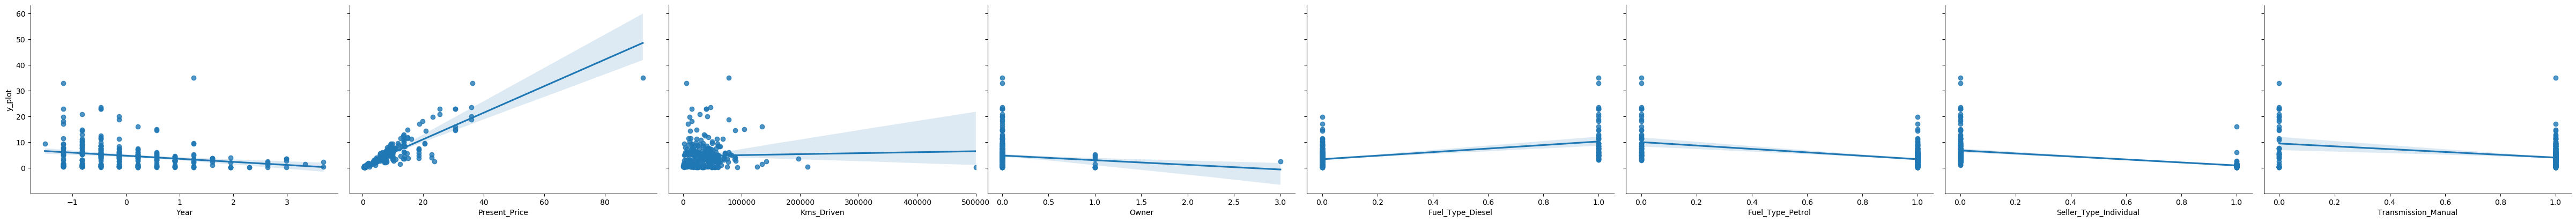

In [32]:
Data=X
Data['y_plot']=y
sns.pairplot(Data,y_vars='y_plot',x_vars=Data.columns[:-1],kind='reg',height=4,aspect=1.5)
plt.show()